# turtlebot3 Two-wheeled self balancing robot model

In [2]:
import numpy as np

In [22]:
# mass of the body (kg)
M_s = 1.003 
# wheel axis to center of gravity (m)
d = 0.215
# gravity (m/sec^2)
g = 9.8
# mass of the wheel (kg)
M_c = 0.1
# n3-directional rotational inertia of the body : 28.07x10^(-3)kgm^2
I_3 = 0.02807
# radius of the wheel
R = 0.0325
# the distance of left and right wheel
L = 0.08
# n3-directional rotational inertia of the body : 3.679x10^(-3)kgm^2
I_2 = 0.003679

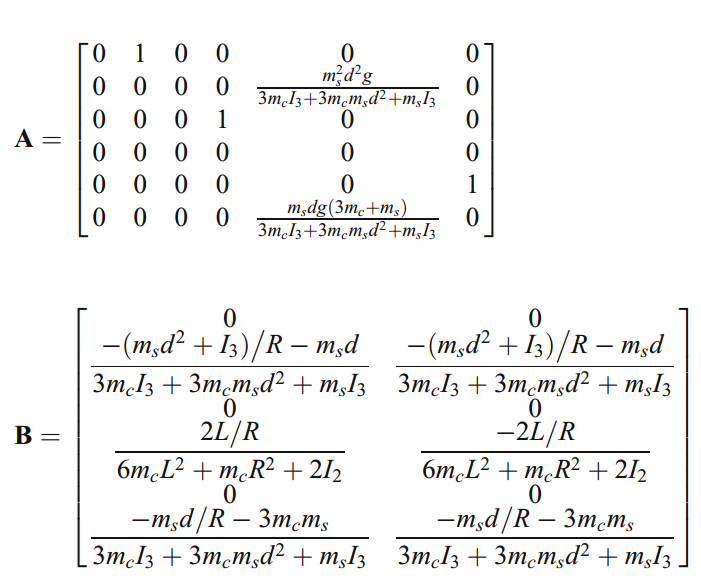

In [69]:
A = np.zeros((6,6))
B = np.zeros((6,2))
C = np.identity(6)
D = np.zeros((6,2))

In [70]:
A[5][5]

0.0

In [71]:
# A[1][4]
num = M_s**2*d**2*g
den_1 = 3*M_c*I_3 + 3*M_c*M_s*d**2 + M_s*I_3
A[1,4] = num/den_1

In [72]:
# A[5,4]
num = M_s*d*g*(3*M_c + M_s)
den_2 = 3*M_c*I_3 + 3*M_c*M_s*d**2 + M_s*I_3
A[5,4] = num/den_2
A[0,1] = 1
A[2,3] = 1
A[4,5] = 1
if den_1 == den_2:
    print(A)


[[ 0.          1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          9.02710336  0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.          0.          0.          0.         54.54481059  0.        ]]


In [73]:
B_den_1 = 3*M_c*I_3 + 3*M_c*M_s*d**2 + M_s*I_3
B_den_2 = 6*M_c*L**2 + M_c*R**2 + 2*I_2
B_den_3 = 3*M_c*I_3 + 3*M_c*M_s*d**2 + M_s*I_3
print(B_den_1, B_den_2, B_den_3)

0.0504843125 0.011303625000000001 0.0504843125


In [74]:
B_num_1_1 = -1*(M_s*d**2 + I_3)/R - M_s*d
B_num_1_2 = B_num_1_1
B_num_2_1 = 2*L/R
B_num_2_2 = -1*B_num_2_1
B_num_3_1 = -1*M_s*d/R - 3*M_c*M_s
B_num_3_2 = B_num_3_1
print(B_num_1_1, B_num_1_2, B_num_2_1, B_num_2_2, B_num_3_1, B_num_3_2)


-2.5059119230769227 -2.5059119230769227 4.923076923076923 -4.923076923076923 -6.936130769230768 -6.936130769230768


In [75]:
B[1,0] = B_num_1_1/B_den_1
B[1,1] = B_num_1_2/B_den_1
print(B[1,0], B[1,1])

-49.637437829363776 -49.637437829363776


In [76]:
B[3,0] = B_num_2_1/B_den_2
B[3,1] = B_num_2_2/B_den_2
print(B[3,0], B[3,1])

435.5308074247795 -435.5308074247795


In [77]:
B[5,0] = B_num_3_1/B_den_3
B[5,1] = B_num_3_2/B_den_3
print(B[5,0], B[5,1])

-137.39180402289855 -137.39180402289855


In [78]:
B

array([[   0.        ,    0.        ],
       [ -49.63743783,  -49.63743783],
       [   0.        ,    0.        ],
       [ 435.53080742, -435.53080742],
       [   0.        ,    0.        ],
       [-137.39180402, -137.39180402]])

In [79]:
C

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [80]:
D

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [100]:
import control

In [94]:
turtlebot3_sys = control.ss(A, B, C, D)

In [95]:
turtlebot3_sys 

StateSpace(array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  9.02710336,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 54.54481059,
         0.        ]]), array([[   0.        ,    0.        ],
       [ -49.63743783,  -49.63743783],
       [   0.        ,    0.        ],
       [ 435.53080742, -435.53080742],
       [   0.        ,    0.        ],
       [-137.39180402, -137.39180402]]), array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 

In [96]:
Q = np.zeros((6,6))
Q[0,0] = 20
Q[1,1] = 5
Q[2,2] = 5
Q[3,3] = 1
Q[4,4] = 100
Q[5,5] = 0.005
R = np.identity(2)

In [104]:
!pip3 install control

In [107]:
K, S, E = control.lqr(turtlebot3_sys , Q, R)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ControlSlycot: can't find slycot module 'sb02md' or 'sb02nt'